In [1]:
import pandas as pd
import scipy.linalg as la
from scipy import stats
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
# dataset stuff

V_data = [] # csv file for visual test scores
A_data = [] # csv file for auditory test scores
twin_data = [] # csv file for twin test scores


#just a simulated dataset to test the statistical measures

# Specify the number of random numbers you want
num_numbers = 100  # Change this to the desired number of random numbers

# Generate a list of random numbers between 0 and 5
X_test_sim = np.array([random.uniform(0, 100) for _ in range(num_numbers)])
y_test_sim = np.array([random.uniform(0, 100) for _ in range(num_numbers)])


In [5]:
# paired t-test 


# Perform the paired t-test

t_sim_statistic, p_sim_value = stats.ttest_rel(X_test_sim, y_test_sim) # for test data
t_statistic, p_value = stats.ttest_rel(V_data, A_data) # for real data




# Output the results for test data 
print("Paired t-test results:")
print(f"t-statistic: {t_sim_statistic}")
print(f"p-value: {p_sim_value}\n")

print("Paired t-test results for the real data:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Interprets the results of the real data
alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between before and after measurements.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between before and after measurements.")


Paired t-test results:
t-statistic: -0.9472582432699431
p-value: 0.34581365323688074

Paired t-test results for the real data:
t-statistic: nan
p-value: nan
Fail to reject the null hypothesis: There is no significant difference between before and after measurements.


In [11]:
# illustration of how to plot the graph
# creates the variables needed to plot the beta parameter

#simulated data
X_test = X_test_sim[:, np.newaxis]
y_test = y_test_sim[:, np.newaxis]
print(X_test.shape, y_test.shape)
beta = la.inv(X_test.T @ X_test) @ X_test.T @ y_test
print(beta.shape)
y_hat = X_test @ beta
#print(beta1)

print(y_hat.shape, beta.shape)
print(beta)

 

# real data (visual score)
# defines the datasets (twin is used in auditory as well)
V_data = V_data[:, np.newaxis]
A_data = A_data[:, np.newaxis]
twin_data = twin_data[:, np.newaxis]


# makes the beta parameter
V_beta = la.inv(V_data.T @ V_data) @ V_data.T @ twin_data
V_y_hat = V_data @ V_beta

# real data (visual score)
# makes the beta parameter 
A_beta = la.inv(A_data.T @ A_data) @ A_data.T @ twin_data
A_y_hat = A_data @ A_beta



(100, 1) (100, 1)
(1, 1)
(100, 1) (1, 1)
[[0.75829537]]


TypeError: list indices must be integers or slices, not tuple

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


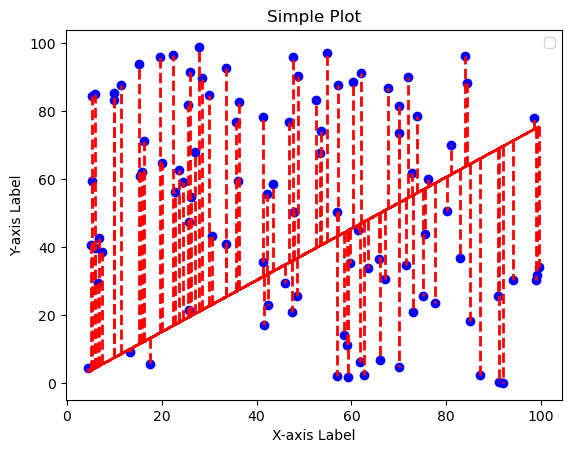

In [12]:
# Create your arrays for x and y coordinates

# Create the plot
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_hat, color='red')

# Add labels and title (optional)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Plot')

# Display the plot

for i in range(y_test.size):
    squared_error = (y_test - y_hat) ** 2
    #plt.annotate(f'SE: {squared_error:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.plot((X_test[i], X_test[i]), (y_hat[i], y_test[i]), linestyle='--', c='red', lw=2)
# Add a legend
plt.legend()
plt.show()

NameError: name 'V_y_hat' is not defined

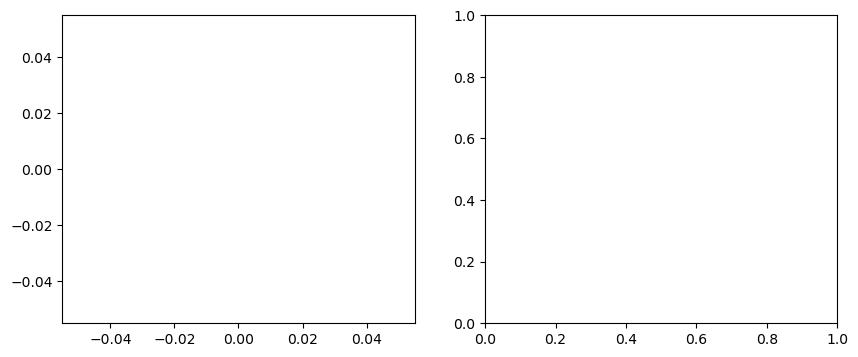

In [21]:
# Create your arrays for x and y coordinates

# Create the plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(V_data, twin_data, color='blue')
ax1.plot(V_data, V_y_hat, color='red')

# Add labels and title (optional)
ax1.xlabel('Visual test score')
ax1.ylabel('Twin score')
ax1.title('Visual test')

# Display the plot

for i in range(y_test.size):
    squared_error = (twin_data - V_y_hat) ** 2
    #plt.annotate(f'SE: {squared_error:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
    ax1.plot((V_data[i], V_data[i]), (V_y_hat[i], twin_data[i]), linestyle='--', c='red', lw=2)
    
# Create your arrays for x and y coordinates

# Create the plot for the auditory and twin score
ax2.scatter(A_data, twin_data, color='blue')
ax2.plot(A_data, A_y_hat, color='red')

# Add labels and title (optional)
ax2.xlabel('Auditory test score')
ax2.ylabel('Twin test score')
ax2.title('Auditory test')

# Display the plot

for i in range(twin_data):
    squared_error = (twin_data - A_y_hat) ** 2
    plt.plot((A_data[i], A_data[i]), (A_y_hat[i], twin_data[i]), linestyle='--', c='red', lw=2)
# Add a legend
plt.tight_layout()
plt.show()

NameError: name 'A_y_hat' is not defined

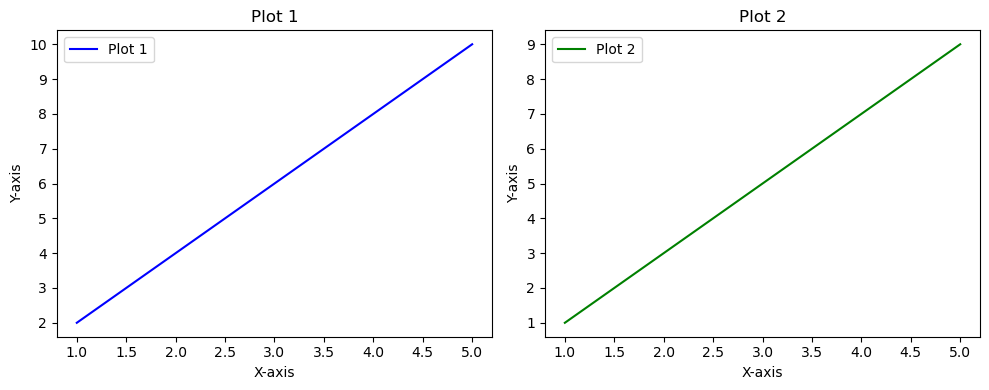

In [15]:
import matplotlib.pyplot as plt

# Create some example data
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 3, 5, 7, 9]

# Create a figure with two subplots arranged side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot on the first subplot (ax1)
ax1.plot(x, y1, label='Plot 1', color='blue')
ax1.set_title('Plot 1')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.legend()

# Plot on the second subplot (ax2)
ax2.plot(x, y2, label='Plot 2', color='green')
ax2.set_title('Plot 2')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
